In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id = "1-A1WWZEo_NUOp3-uxU8in5Z1e0vw6ucn"

In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_data')  

In [5]:
test_data = pd.read_pickle("test_data")

In [6]:
test_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment
794682,1,Racist comments are really rare on the interne...,Targash,news,6.0,6.0,0.0,2014-06,11/6/14 16:02,"perhaps it is your bias dear redditor, and non...",Racist comment really rare internet 's clearly...,"perhaps bias dear redditor , none .",Racist comments are really rare on the interne...,perhaps it is your bias dear redditor and none...,Racist comment really rare internet clearly re...,perhaps bias dear redditor none,"[-0.2260461, -0.5411476, -0.5956079, 1.6732603...","[-0.5515428, -0.59989977, 0.069325216, 1.59275...","[-0.24906166, -0.65218884, 0.12795807, 0.64601...","[-0.33440658, -0.508268, 0.3577558, 0.4706608,...",0.250085,0.188576,27,2,0,0,0,0,0,0,0,0,0,neg
1003517,0,"yes, if good taste is what a cock doodle shoul...",superfusion1,sex,8.0,8.0,0.0,2011-01,19/1/11 15:32,That's the most tasteful video I have ever see...,"yes , good taste cock doodle , let cock doodle .",That 's tasteful video I ever see cock doodle .,yes if good taste is what a cock doodle should...,Thats the most tasteful video I have ever seen...,yes good taste cock doodle let cock doodle,Thats tasteful video I ever see cock doodle,"[-0.7737616, 0.4774656, 0.13742262, 0.18524809...","[-0.76534796, 0.46344534, -0.03482504, -0.1605...","[-0.19669841, 0.023759527, 0.39963058, -0.1046...","[-0.32654247, 0.2684772, 0.13918118, 0.0023651...",0.249204,0.183911,18,3,0,0,0,0,0,0,0,0,0,pos
526207,1,Totally not photoshopped...,RB30DETT,funny,11.0,11.0,0.0,2015-12,11/12/15 17:29,London Underground,Totally photoshopped ...,London Underground,Totally not photoshopped,London Underground,Totally photoshopped,London Underground,"[-0.14899243, -0.19366069, -0.20084605, 0.6875...","[-0.11780262, -0.2061242, 0.010147771, 0.53536...","[0.20910913, -0.055749796, 0.017575901, 0.4827...","[0.11732921, -0.14933924, 0.042169612, 0.49933...",0.760832,0.762000,3,3,0,0,0,1,0,0,0,0,0,neu
169751,1,"No, there's too much sexism in those industrie...",randomcombination102,TumblrInAction,50.0,-1.0,-1.0,2016-12,18/12/16 2:17,"Yeah, it's much easier to bitch about male pri...","No , 's much sexism industry make dangerous wo...","Yeah , 's much easy bitch male privilege inter...",No theres too much sexism in those industries ...,Yeah its much easier to bitch about male privi...,No there much sexism industry make dangerous w...,Yeah much easy bitch male privilege internet l...,"[0.24865268, 0.7403738, 0.05449423, 0.81168157...","[0.31113982, 1.0847201, 0.07776833, 0.32138768...","[-0.6251248, -0.3786881, 0.0020529833, 1.26597...","[-0.52135706, -0.47163898, -0.053898532, 1.226...",0.222351,0.213574,18,3,0,0,0,0,0,0,0,0,0,neg
585774,0,Maybe they should take a leaf from the lending...,MemorableYetUnique,unitedkingdom,1.0,1.0,0.0,2015-10,19/10/15 20:15,It's because they specifically want to offer l...,Maybe take leaf lending industry 's playbook o...,It 's specifically want offer loss-making ( bo...,Maybe they should take a leaf from the lending...,Its because they specifically want to offer lo...,Maybe take leaf lending industry playbook offe...,Its specifically want offer lossmaking bookie ...,"[0.022282721, 0.008266672, 0.74342155, 0.85941...","[0.8069845, 0.17959124, 0.5259561, 1.3175151, ...","[-1.6010864, 1.8231604, -0.28390932, 0.6216357...","[-2.014457, 2.110243, -0.8449971, 1.1744075, 0...",0.192439,0.108372,21,9,0,0,0,1,0,0,0,1,0,neu


In [7]:
id = "1OCYpK5PSvWhmI06PdYzyr7K1psLPOt25"

In [8]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('base_pred')  

In [9]:
with open('base_pred', 'rb') as f:
    base_pred = np.load(f)

In [10]:
id = '15I1NNoZUZkkE8aZchPm4y0zRLOCtLzNv'

In [11]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('feature_pred')  

In [12]:
with open('feature_pred', 'rb') as f:
    feature_pred = np.load(f)

In [13]:
id = '1hDy1SadRQ-Bjqh7tPiPDNucWlNRymVgh'

In [14]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('hyper_pred')  

In [15]:
with open('hyper_pred', 'rb') as f:
    hyper_pred = np.load(f)

In [16]:
test_data['base_pred'] = base_pred
test_data['feature_pred'] = feature_pred
test_data['hyper_pred'] = hyper_pred

In [ ]:
len(test_data[(test_data['base_pred']==test_data['label'])])/len(test_data)

0.6400482771583748

In [ ]:
len(test_data[(test_data['feature_pred']==test_data['label'])])/len(test_data)

0.6442972606669767

In [ ]:
len(test_data[(test_data['hyper_pred']==test_data['label'])])/len(test_data)

0.6503615840447948

# Analysis from base pred to feature pred

In [ ]:
feature_pred_improve = test_data[(test_data['base_pred']!=test_data['label']) & (test_data['feature_pred']==test_data['label'])] # 11756 predicted correctly after using features

In [ ]:
feature_pred_worse = test_data[(test_data['base_pred']==test_data['label']) & (test_data['feature_pred']!=test_data['label'])]  # 10897 predicted wrongly after using features

In [ ]:
feature_pred_improve

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
423320,0,I heard peanut shell.,I_know_left,funny,1.0,1.0,0.0,2015-11,26/11/15 6:56,He said pencil. No clue what you thought he said.,I hear peanut shell .,He say pencil . No clue think say .,I heard peanut shell,He said pencil No clue what you thought he said,I hear peanut shell,He say pencil No clue think say,"[-0.6130061, -0.045813404, 0.5942312, 0.058852...","[-0.4646106, 0.0019069029, 0.5800361, 0.002737...","[-0.38534665, -0.73051697, 0.33822358, 0.29372...","[-0.36630335, -0.88980794, 0.21113868, 0.18037...",0.213754,0.225426,4,1,0,0,0,0,0,0,0,0,0,neu,1,0,0
863418,1,These newfangled automobiles with their engine...,michaelGregoire,vim,1.0,1.0,0.0,2014-09,13/9/14 18:39,:syntax on,These newfangled automobile engine wheel crap ...,: syntax,These newfangled automobiles with their engine...,syntax on,These newfangled automobile engine wheel crap ...,syntax,"[0.7659738, -2.0573118, 0.35538575, 1.5123426,...","[0.46817, -1.9479036, -0.062023938, 1.2619452,...","[0.27471253, -0.07106915, 0.10322713, 0.331914...","[0.2879494, -0.05786264, 0.1388747, 0.3917434,...",0.294449,0.259781,17,7,0,0,0,1,0,0,0,0,0,neg,0,1,0
515701,0,Imagine how that story would look and the cove...,JumpingJazzJam,politics,15.0,15.0,0.0,2015-05,20/5/15 3:28,Former 4th District Congressional Candidate Ad...,Imagine story would look coverage would give M...,Former 4th District Congressional Candidate Ad...,Imagine how that story would look and the cove...,Former 4th District Congressional Candidate Ad...,Imagine story would look coverage would give M...,Former 4th District Congressional Candidate Ad...,"[0.83701116, -0.41211316, 0.49463952, 0.123601...","[0.4772499, -0.6014095, 0.3976107, -0.01077956...","[0.7259745, -0.29701772, -0.35889786, 0.404098...","[0.78698534, -0.2936881, -0.51529187, 0.472932...",0.319438,0.242527,24,1,0,0,0,0,0,0,0,0,0,neg,1,0,0
57823,1,"It's not an insult, is just so next level and ...",moonwork,technology,1.0,-1.0,-1.0,2016-10,31/10/16 7:38,They have dropped the ball big time. I underst...,"It 's insult , next level box n't understand y...",They drop ball big time . I understand busines...,Its not an insult is just so next level and ou...,They have dropped the ball big time I understa...,Its insult next level box dont understand yet,They drop ball big time I understand business ...,"[0.08810219, 0.19384408, 0.09450468, 0.2094247...","[0.008716122, 0.14429657, -0.011850972, 0.7812...","[-0.10595348, -0.50639266, -0.08680472, 0.6648...","[-0.2408253, -0.36626676, 0.16634691, 0.752905...",0.347323,0.327776,20,4,0,1,0,0,0,0,0,0,0,pos,0,1,1
347735,0,20-22 lbs I think,jgibo1,bikecommuting,1.0,1.0,0.0,2016-07,22/7/16 13:02,What's the weight capacity of that rack?,20-22 lb I think,What 's weight capacity rack ?,2022 lbs I think,Whats the weight capacity of that rack,2022 lb I think,Whats weight capacity rack,"[-0.35175377, 0.06656026, 0.15989459, 0.544872...","[-0.3957764, -0.115437716, 0.072718956, 0.3716...","[-0.13836156, 0.01939116, 0.15282188, 0.512202...","[-0.45481554, -0.0015230564, 0.41140103, 0.689...",0.348753,0.220952,4,1,0,0,0,0,0,0,0,0,0,neu,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788091,1,Awwwwwww those poor puppy farms!,Marcusaralius76,nottheonion,10.0,10.0,0.0,2015-02,28/2/15 14:28,"Pet shops, dog breeders ira

In [ ]:
counts =['word_count',
       'punctuation_count', 'has_repeated', 'exclaim_count', 'qns_mark_count',
       'ellipses_mark_count', 'interjection_count', 'laughter_words_count',
       'capitalized_word_count', 'partial_capital_word_count',
       'emoticon_count','clean_cosine_similarity']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 100.0)]

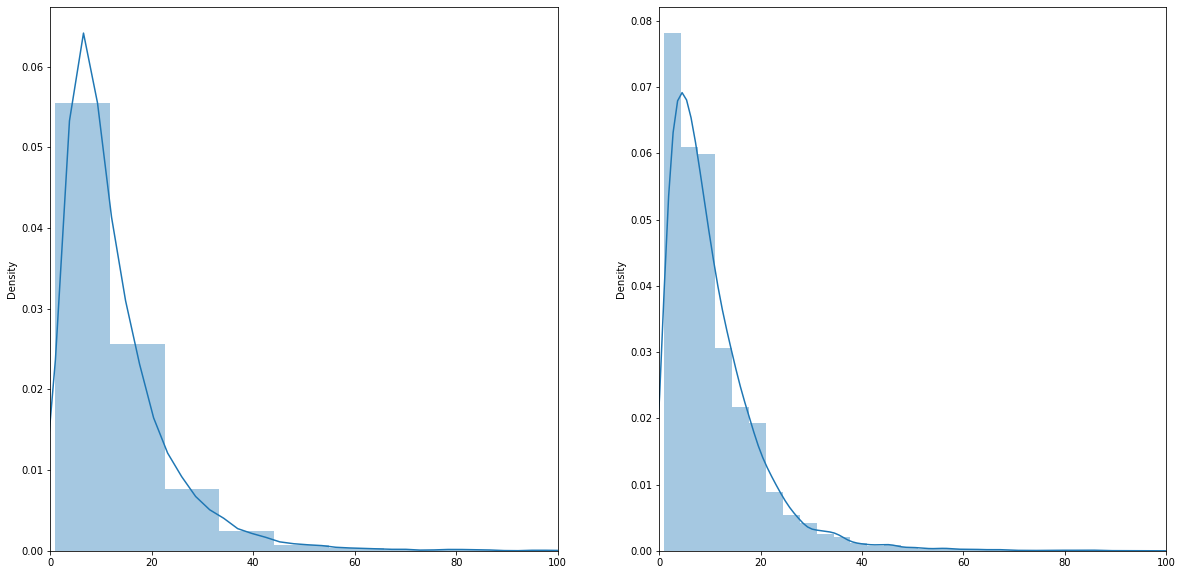

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=100)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['word_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['word_count'])
a.set(xlim=(0, 100))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 10.0)]

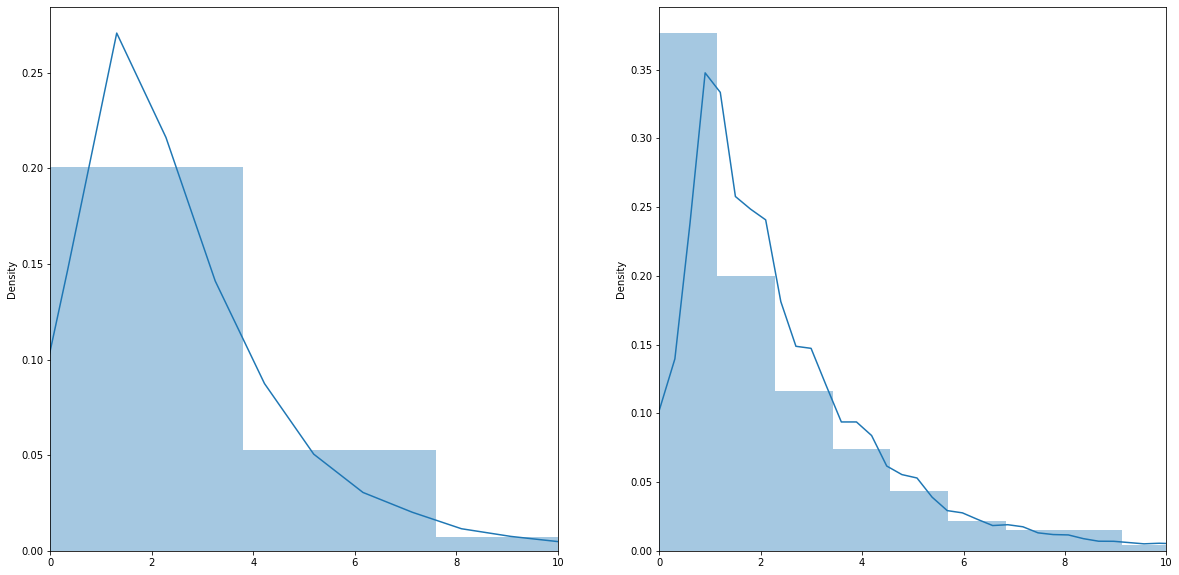

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['punctuation_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['punctuation_count'])
a.set(xlim=(0, 10))

For the right side, for each punctuation count, the density has more variance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

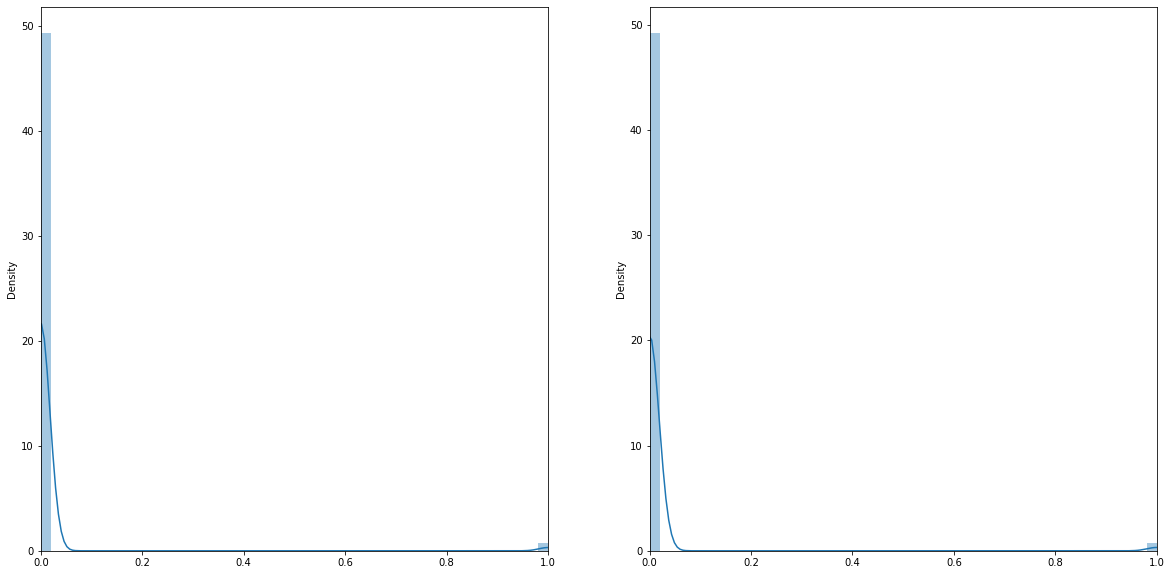

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=1)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['has_repeated'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['has_repeated'])
a.set(xlim=(0, 1))

[(0.0, 2.0)]

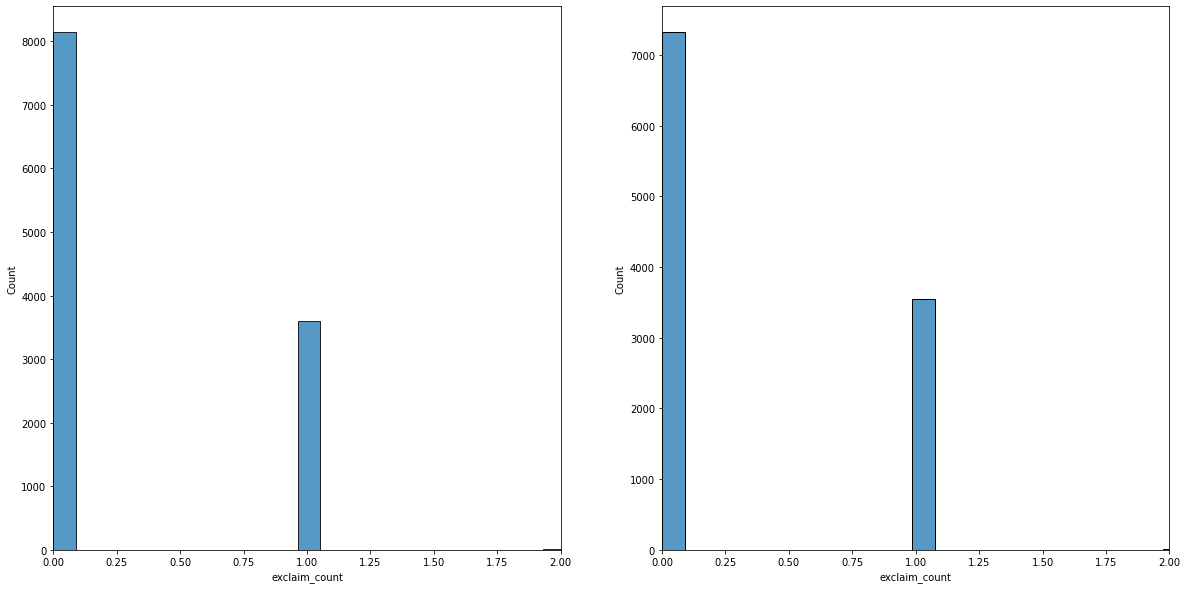

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['exclaim_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['exclaim_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

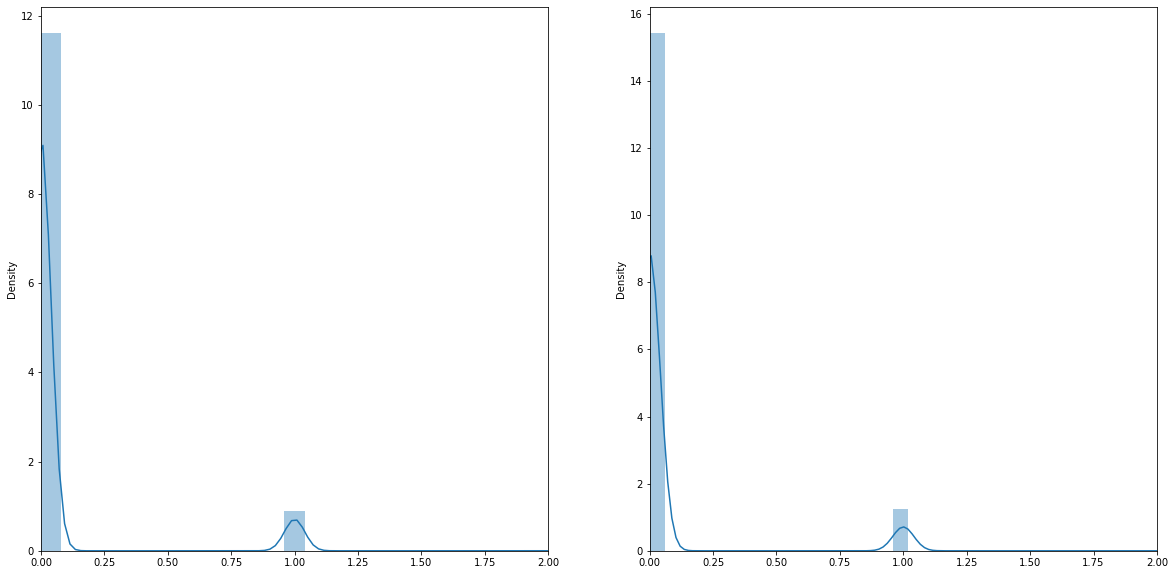

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['qns_mark_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['qns_mark_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 4.0)]

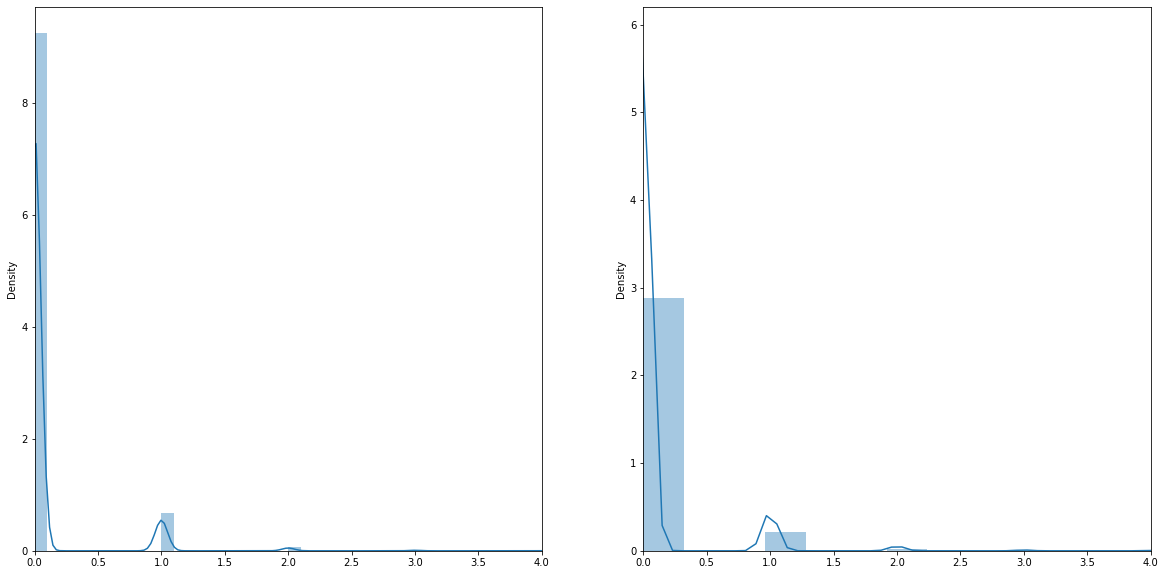

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=4)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['ellipses_mark_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['ellipses_mark_count'])
a.set(xlim=(0, 4))

[(0.0, 2.0)]

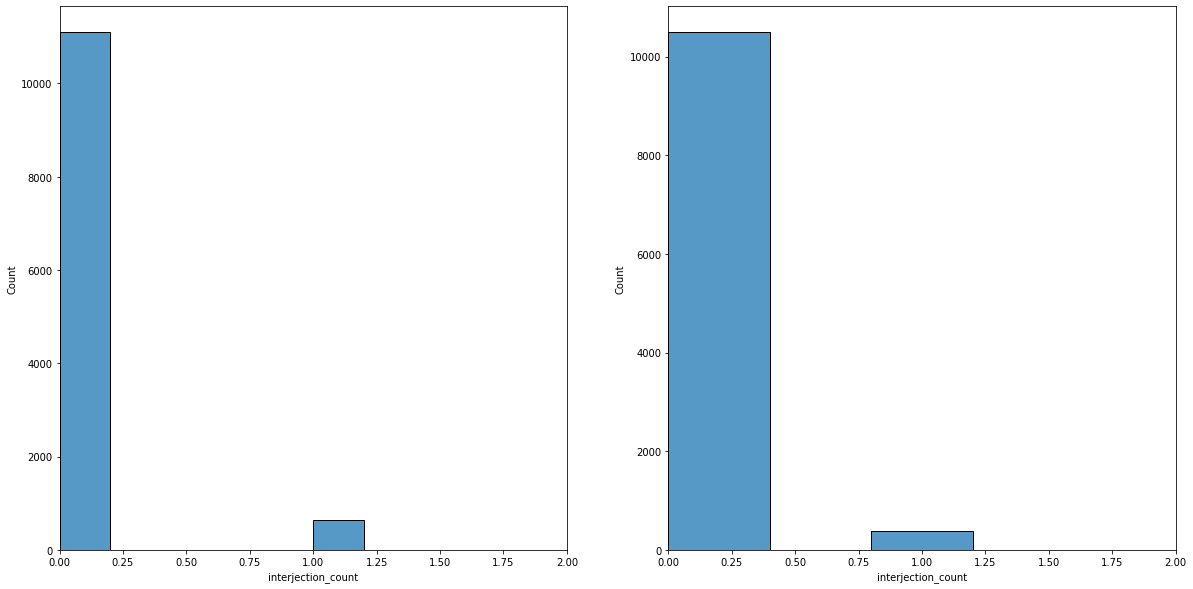

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['interjection_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['interjection_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

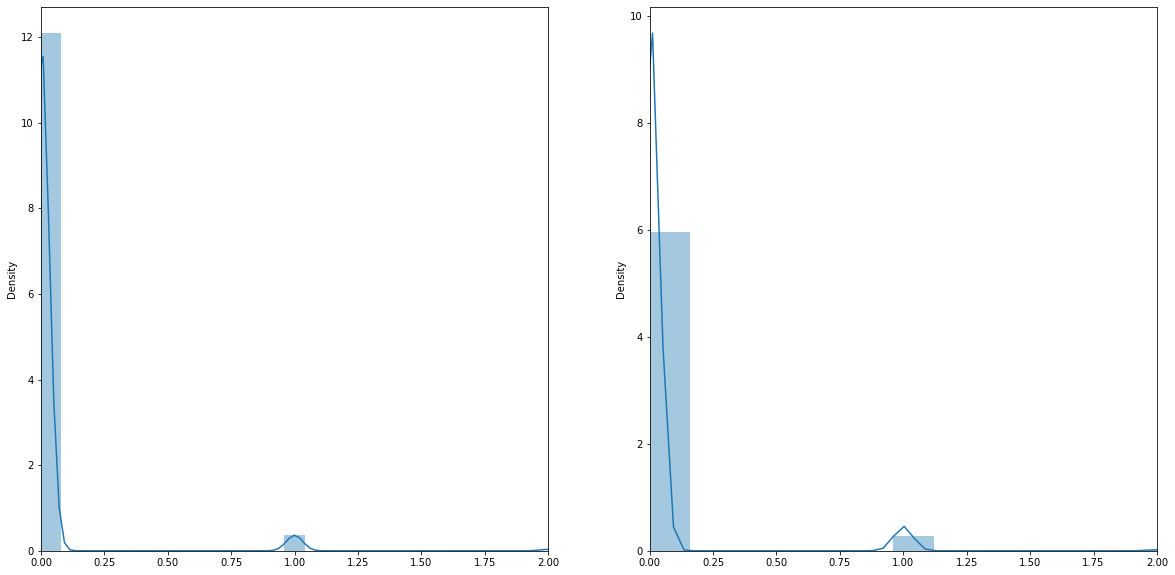

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['laughter_words_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['laughter_words_count'])
a.set(xlim=(0, 2))

[(0.0, 10.0)]

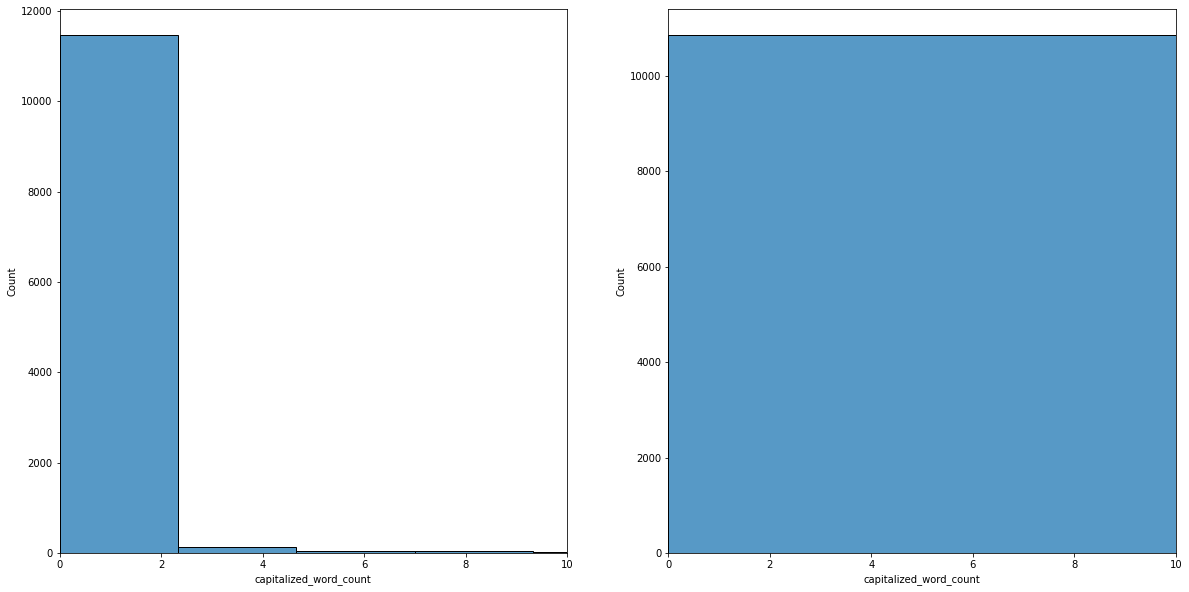

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['capitalized_word_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['capitalized_word_count'])
a.set(xlim=(0, 10))

(0.0, 10.0)

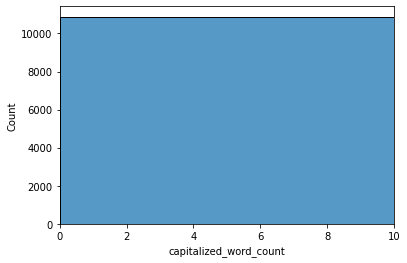

In [ ]:
sns.histplot(feature_pred_worse['capitalized_word_count'],bins=10)
plt.xlim(0,10)

[(0.0, 2.0)]

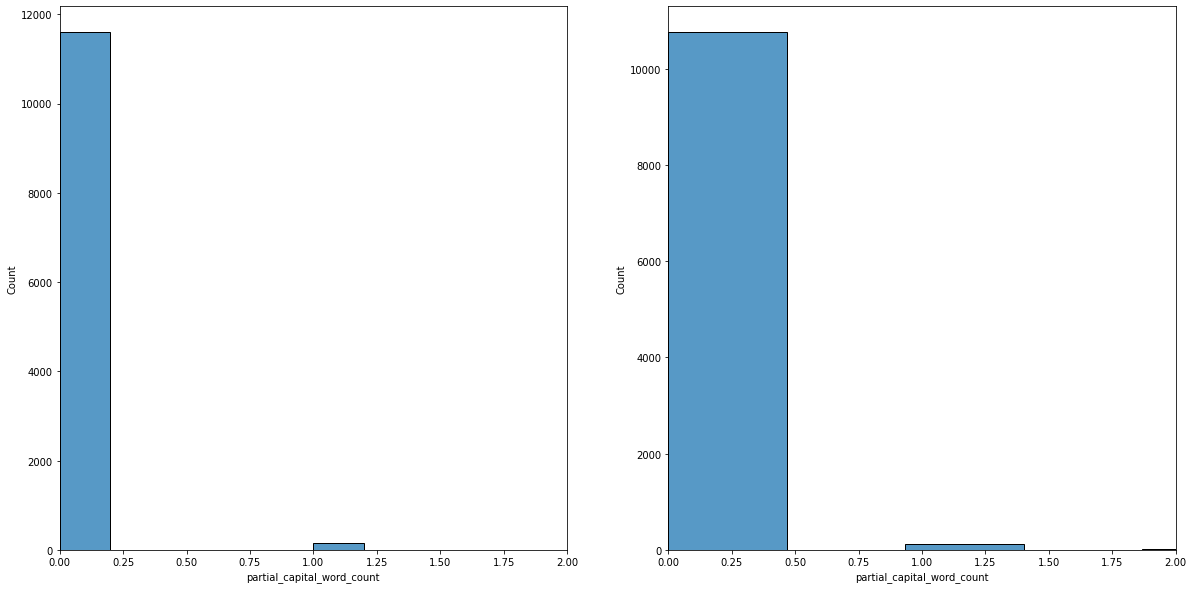

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['partial_capital_word_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['partial_capital_word_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

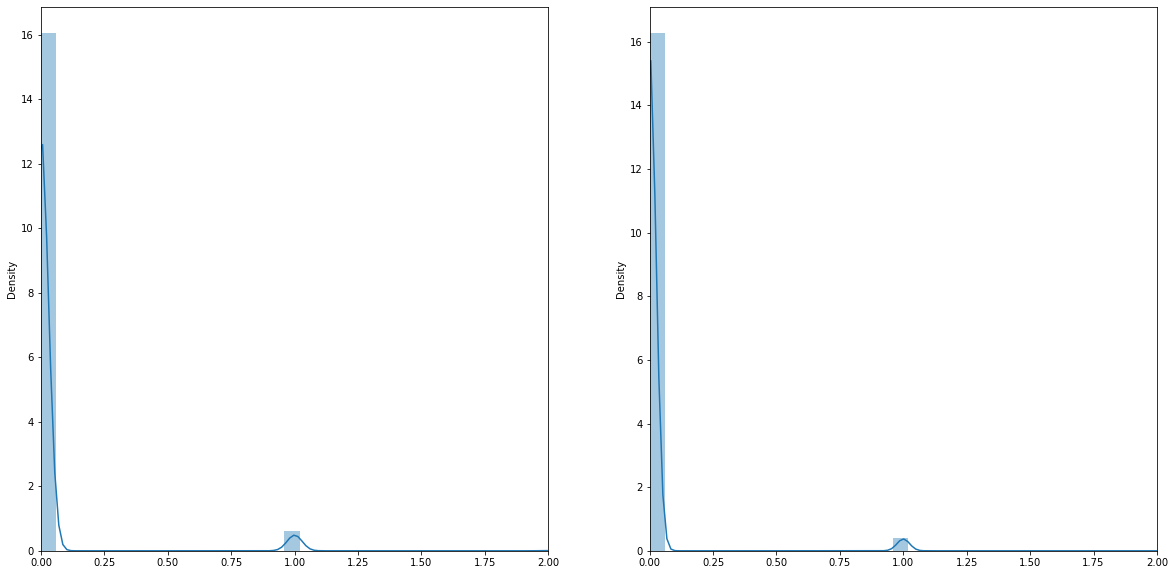

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['emoticon_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['emoticon_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


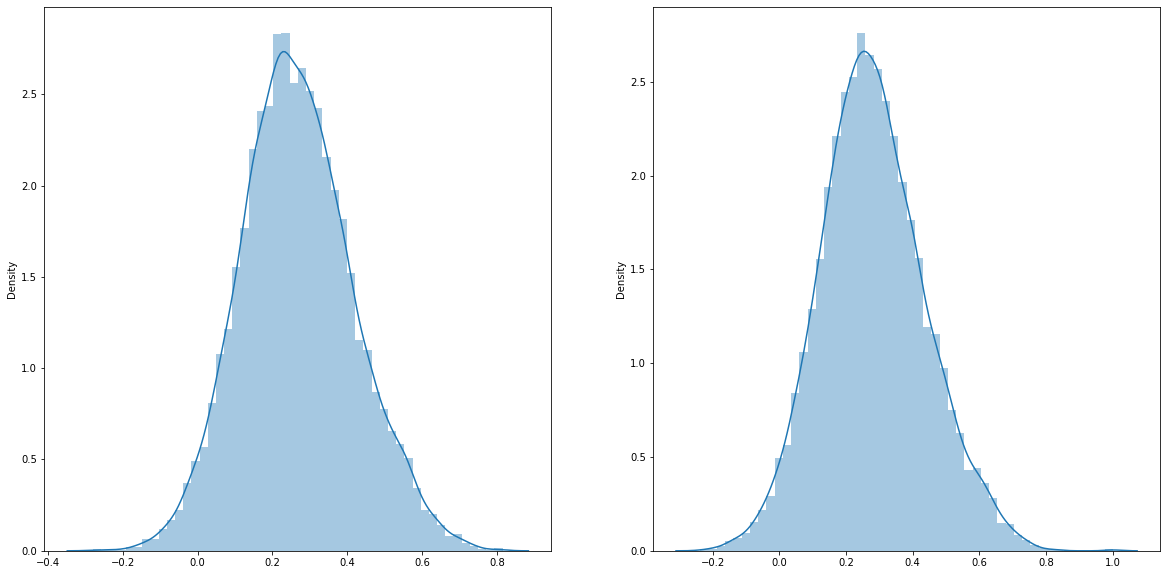

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
a = sns.distplot(ax=axes[0], x=feature_pred_improve['clean_cosine_similarity'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['clean_cosine_similarity'])

In [ ]:
feature_pred_worse['clean_cosine_similarity'].describe()

count    10897.000000
mean         0.281149
std          0.156325
min         -0.237017
25%          0.175664
50%          0.273242
75%          0.380439
max          1.000000
Name: clean_cosine_similarity, dtype: float64

In [ ]:
feature_pred_improve['clean_cosine_similarity'].describe()

count    11756.000000
mean         0.267054
std          0.149427
min         -0.279057
25%          0.164584
50%          0.259725
75%          0.363181
max          0.814787
Name: clean_cosine_similarity, dtype: float64

The left side the max cosine similarity <1, which means after using the other features for the model, the model predicts better for comments that are more different form parent comments


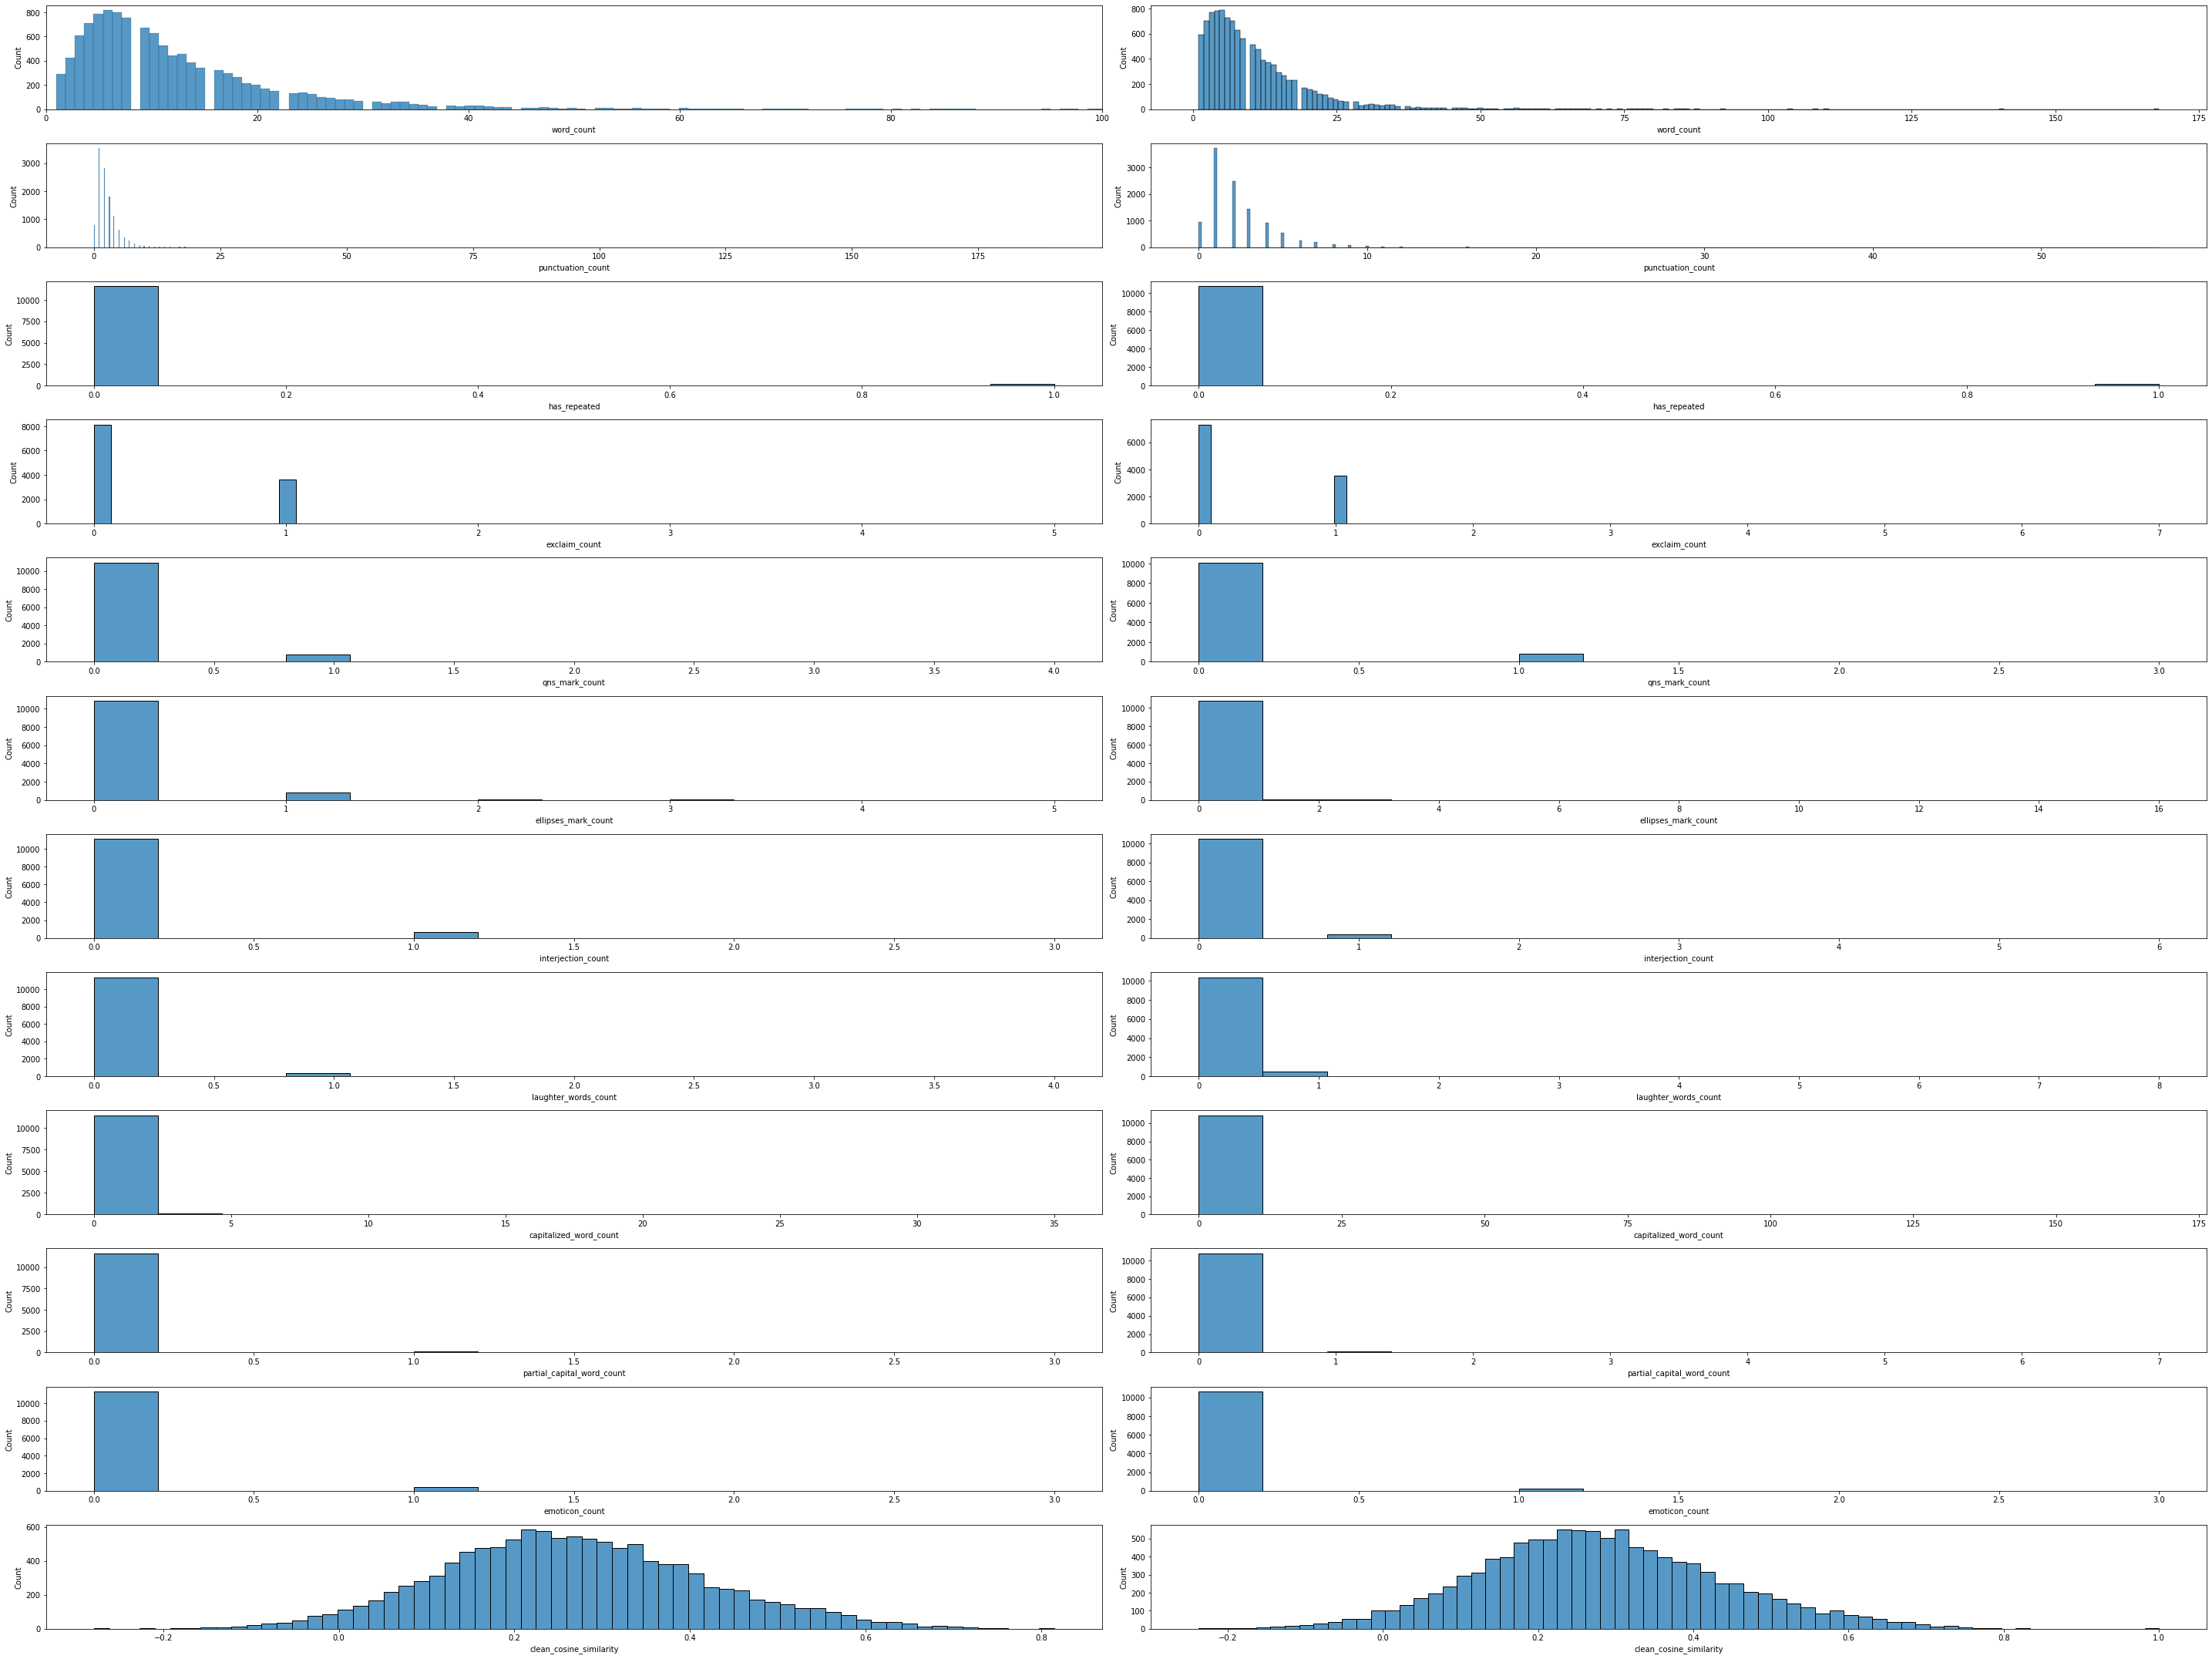

In [ ]:
plt.figure(figsize=(40,30))
k=1
for i in counts:
  plt.subplot(12,2,k)
  sns.histplot(x=feature_pred_improve[i])
  
  plt.subplot(12,2,k+1)
  sns.histplot(x=feature_pred_worse[i])
  k+=2
plt.tight_layout()

# From feature pred to hyper pred


In [ ]:
hyper_pred_improve = test_data[(test_data['feature_pred']!=test_data['label']) & (test_data['hyper_pred']==test_data['label'])] # 6386 predicted correctly after tuning

In [ ]:
hyper_pred_worse = test_data[(test_data['feature_pred']==test_data['label']) & (test_data['hyper_pred']!=test_data['label'])]  # 5160 predicted wrongly after using features

In [ ]:
counts =['word_count',
       'punctuation_count', 'has_repeated', 'exclaim_count', 'qns_mark_count',
       'ellipses_mark_count', 'interjection_count', 'laughter_words_count',
       'capitalized_word_count', 'partial_capital_word_count',
       'emoticon_count','clean_cosine_similarity']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 200.0)]

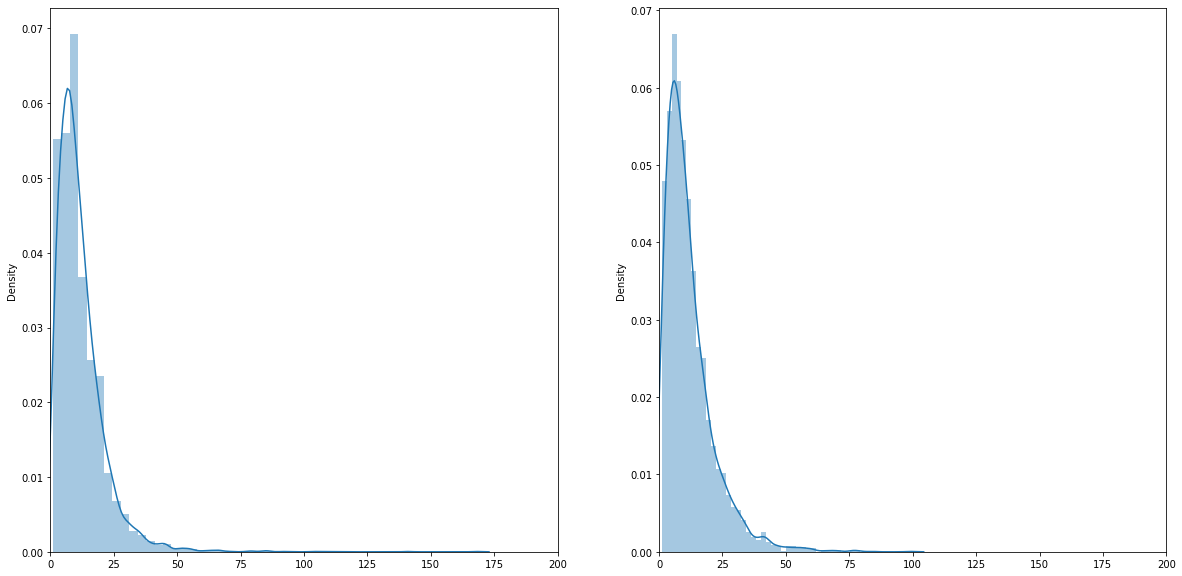

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=200)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['word_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['word_count'])
a.set(xlim=(0, 200))

[(0.0, 10.0)]

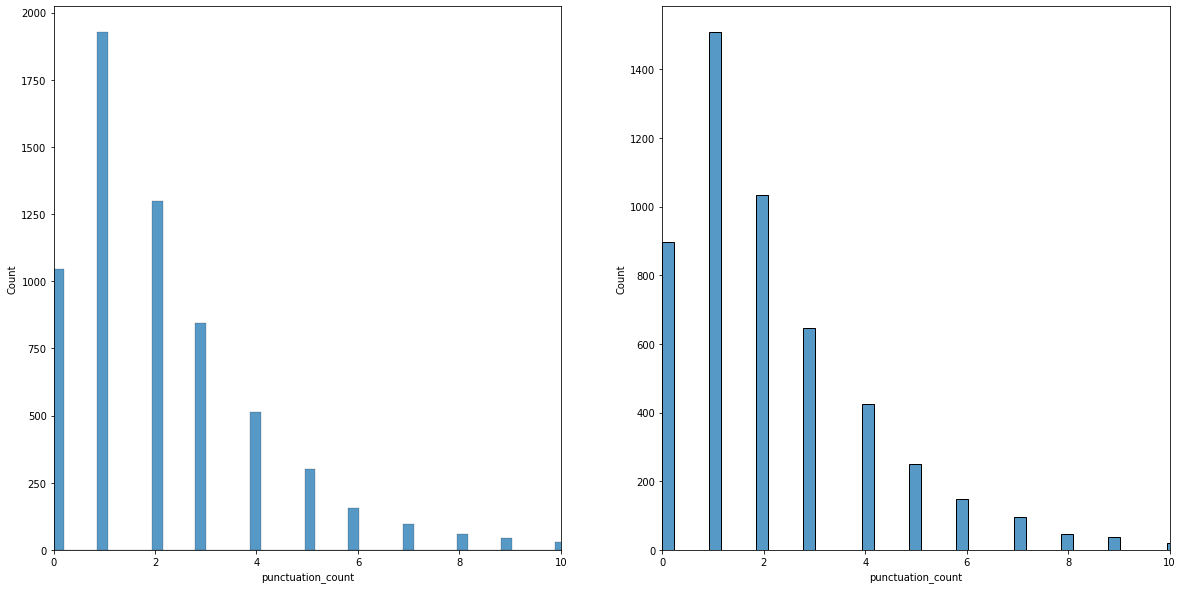

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['punctuation_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['punctuation_count'])
a.set(xlim=(0, 10))

For the right side, for each punctuation count, the density has more variance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

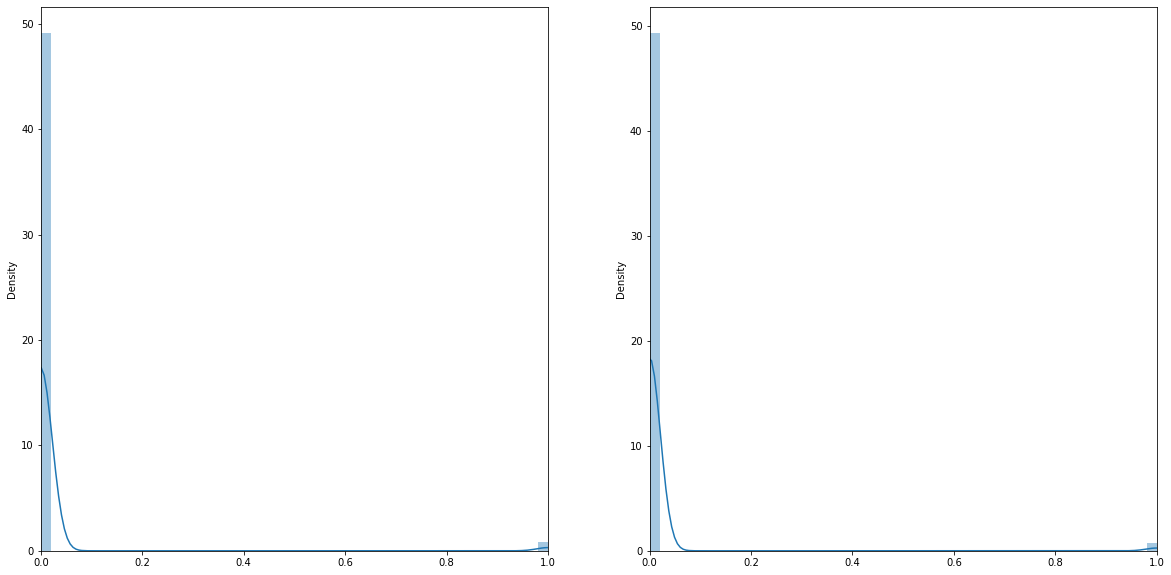

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=1)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['has_repeated'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['has_repeated'])
a.set(xlim=(0, 1))

[(0.0, 2.0)]

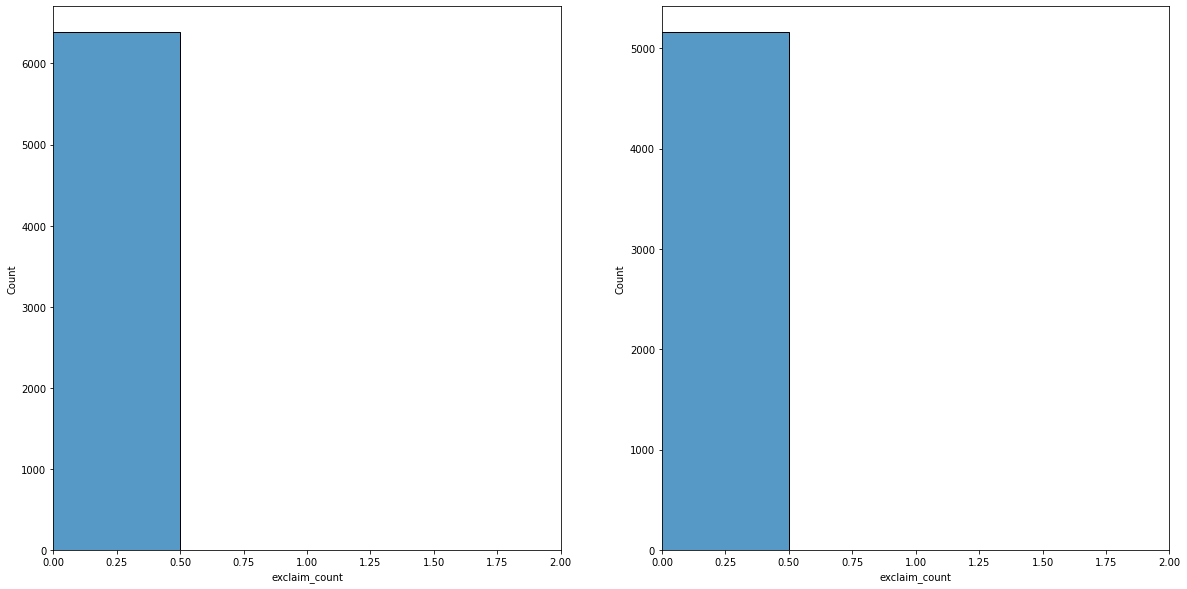

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['exclaim_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['exclaim_count'])
a.set(xlim=(0, 2))

In [ ]:
sum(hyper_pred_improve['exclaim_count'])

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

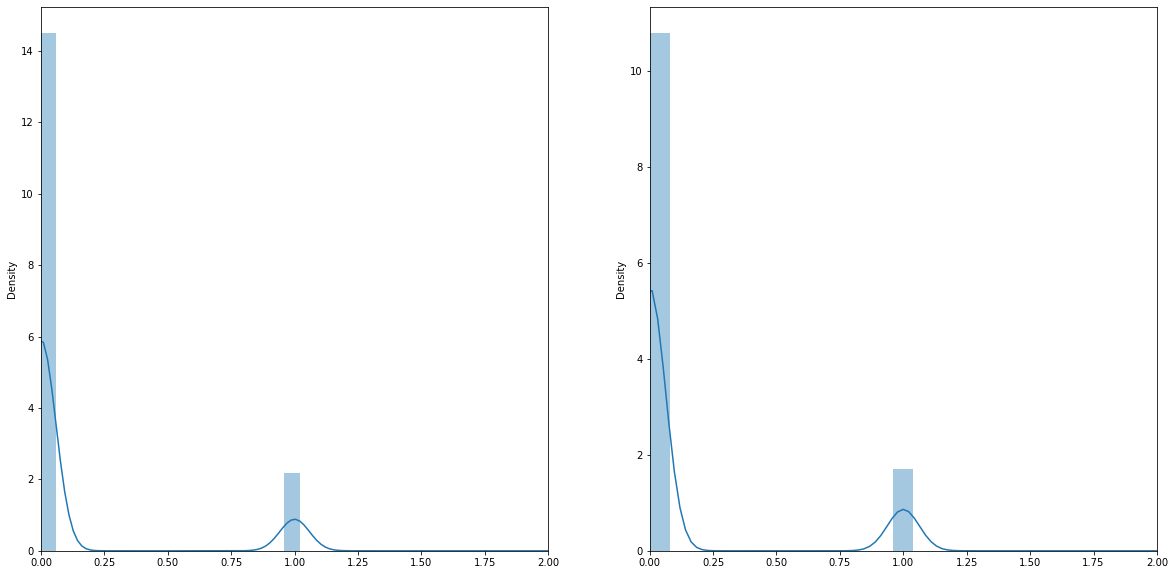

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['qns_mark_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['qns_mark_count'])
a.set(xlim=(0, 2))

[(0.0, 4.0)]

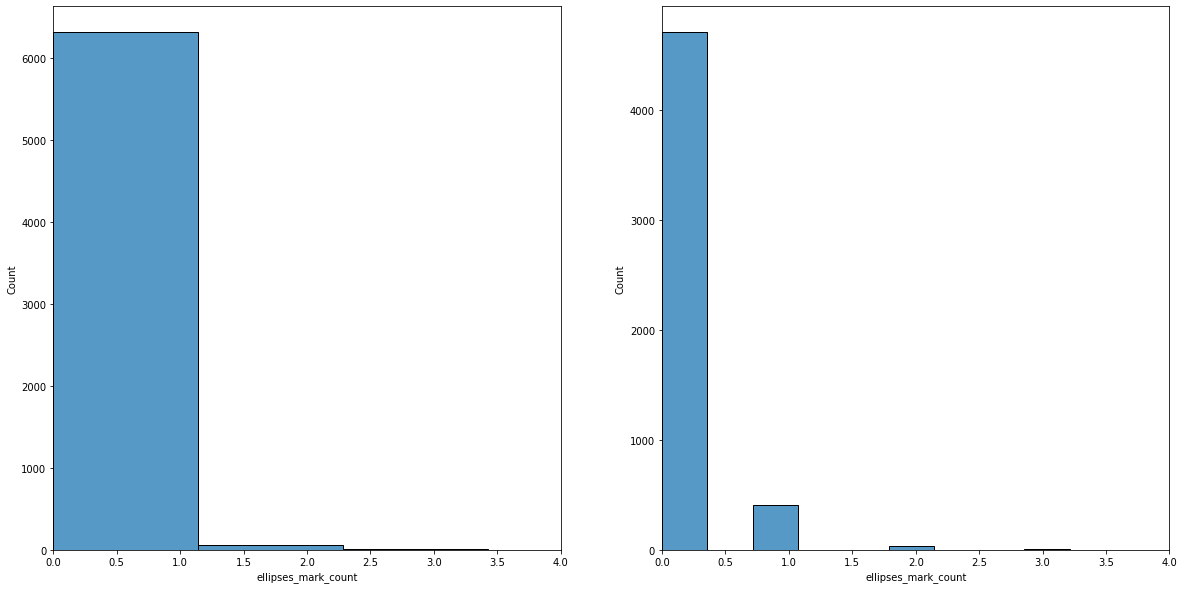

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=4)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['ellipses_mark_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['ellipses_mark_count'])
a.set(xlim=(0, 4))

In [ ]:
hyper_pred_improve['ellipses_mark_count'].describe()

count    6386.000000
mean        0.110711
std         0.434374
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: ellipses_mark_count, dtype: float64

[(0.0, 5.0)]

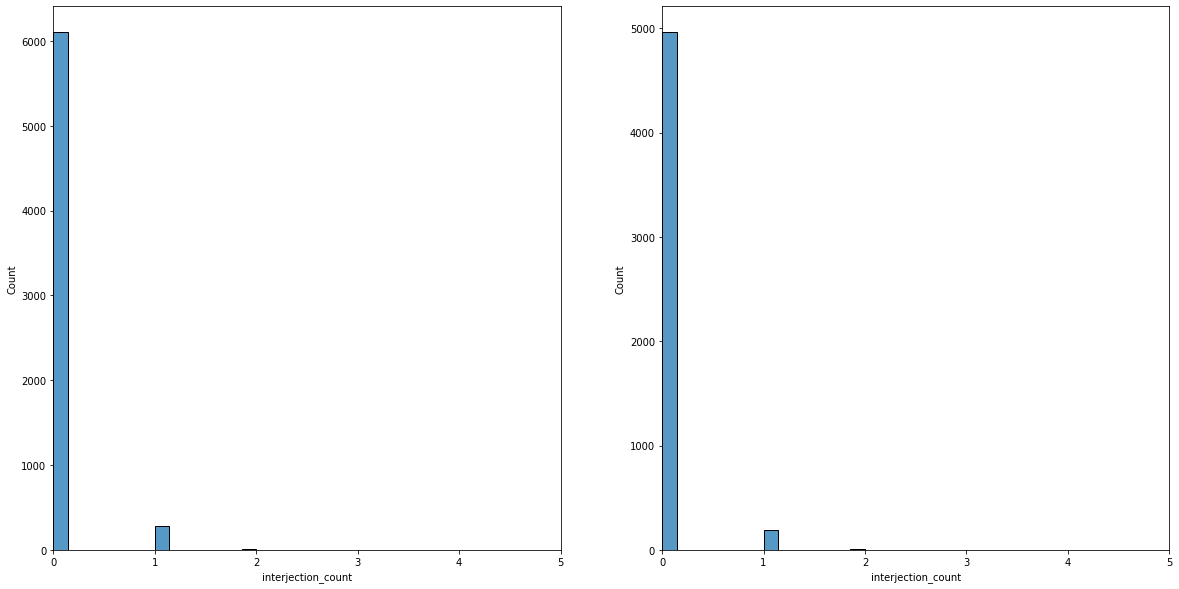

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=5)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['interjection_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['interjection_count'])
a.set(xlim=(0, 5))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

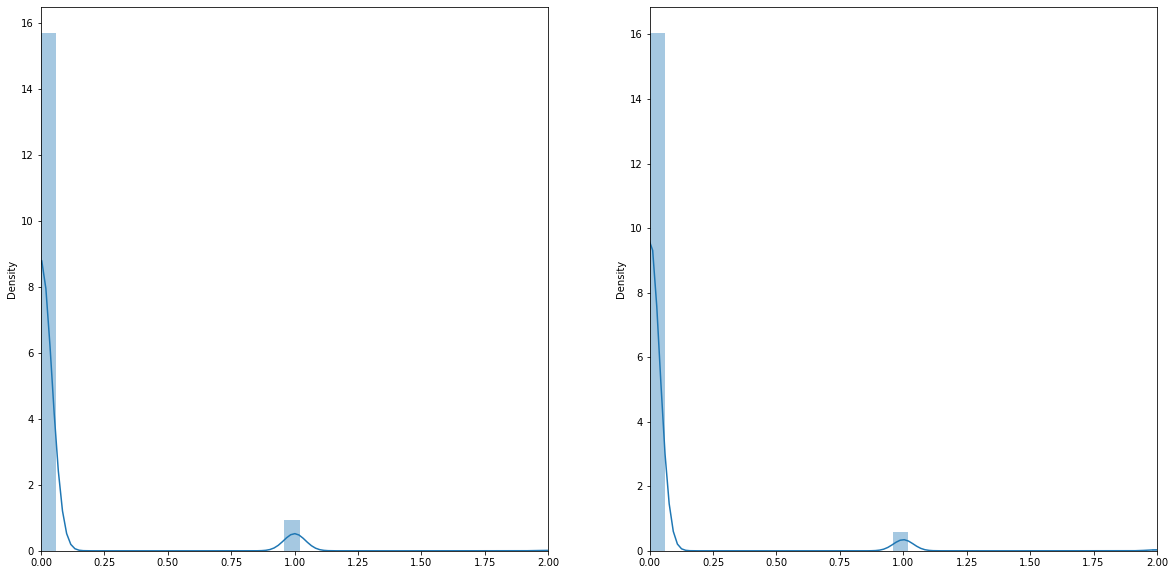

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['laughter_words_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['laughter_words_count'])
a.set(xlim=(0, 2))

[(0.0, 10.0)]

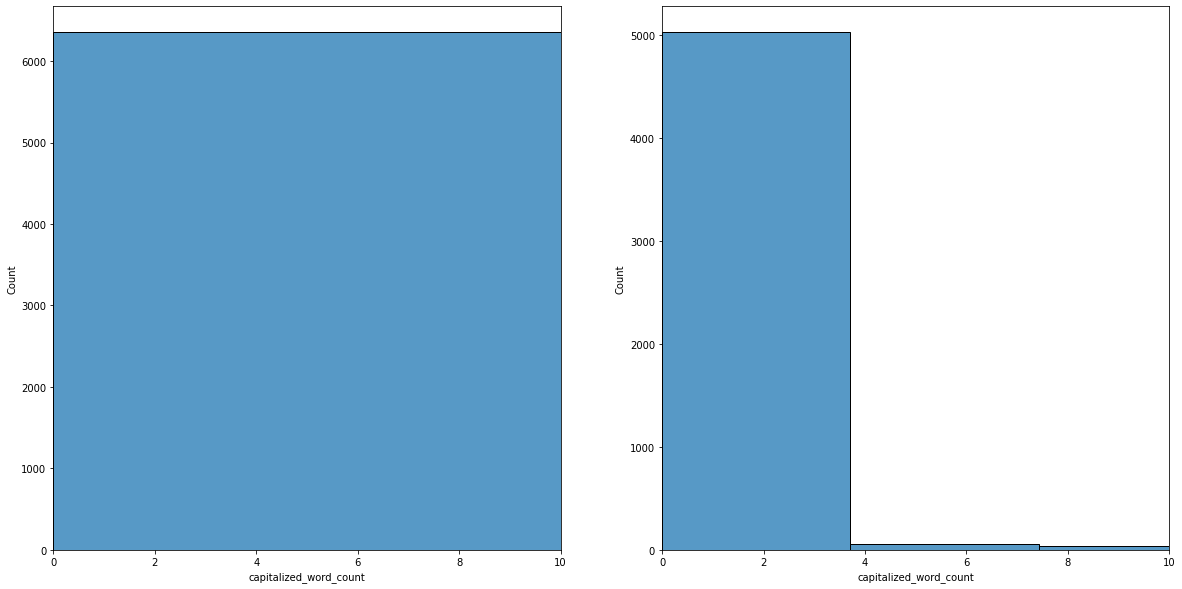

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['capitalized_word_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['capitalized_word_count'])
a.set(xlim=(0, 10))

(0.0, 10.0)

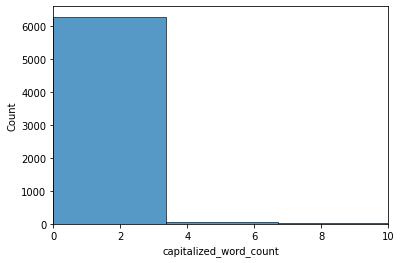

In [ ]:
sns.histplot(hyper_pred_improve['capitalized_word_count'],bins=50)
plt.xlim(0,10)

After hyperparameter tuning, the model can predict comments without capitalized words better.

In [ ]:
hyper_pred_improve['capitalized_word_count'].describe()

count    6386.000000
mean        0.351863
std         2.817174
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       168.000000
Name: capitalized_word_count, dtype: float64

In [ ]:
hyper_pred_worse['capitalized_word_count'].describe()

count    5160.000000
mean        0.390116
std         1.879780
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        52.000000
Name: capitalized_word_count, dtype: float64

[(0.0, 2.0)]

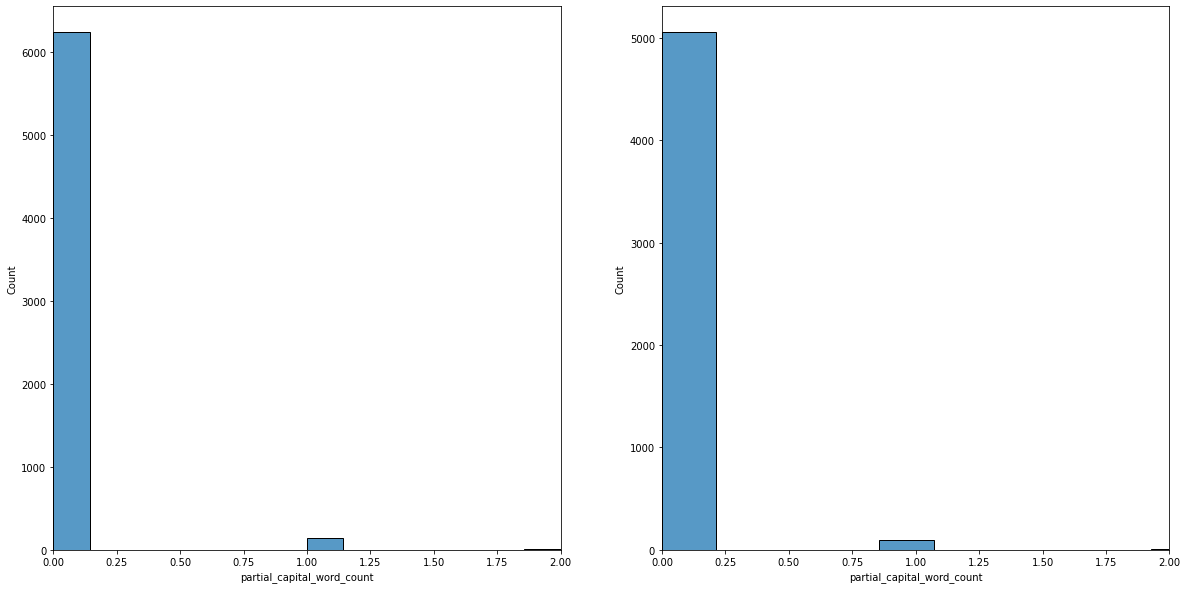

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['partial_capital_word_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['partial_capital_word_count'])
a.set(xlim=(0, 2))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['emoticon_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['emoticon_count'])
a.set(xlim=(0, 2))

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


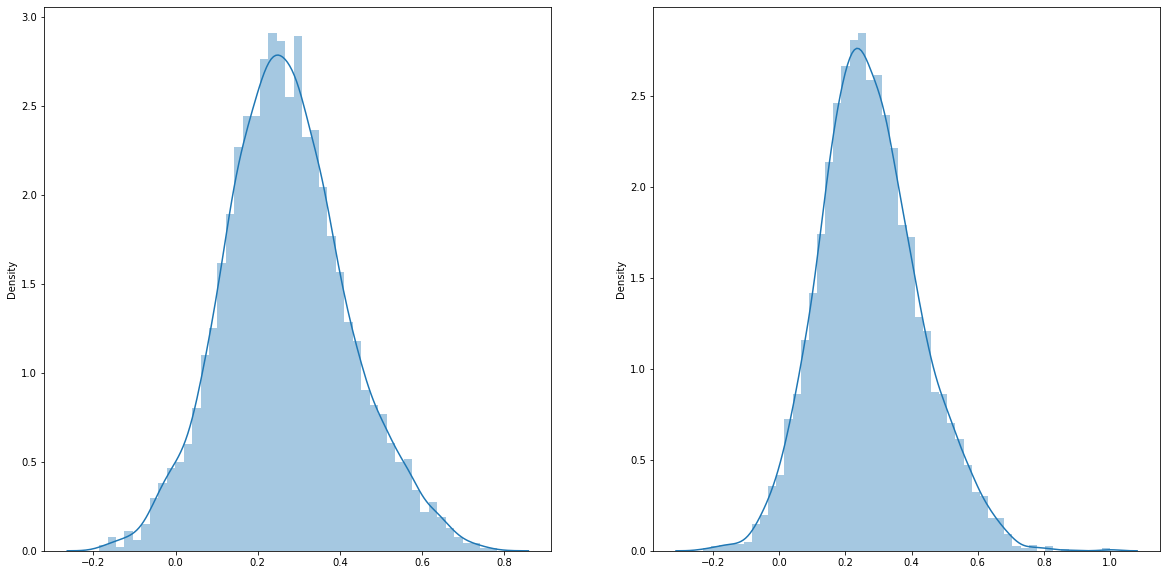

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['clean_cosine_similarity'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['clean_cosine_similarity'])

After hyperparameter tuning, the model predicts comment that are more different than parent comments better.

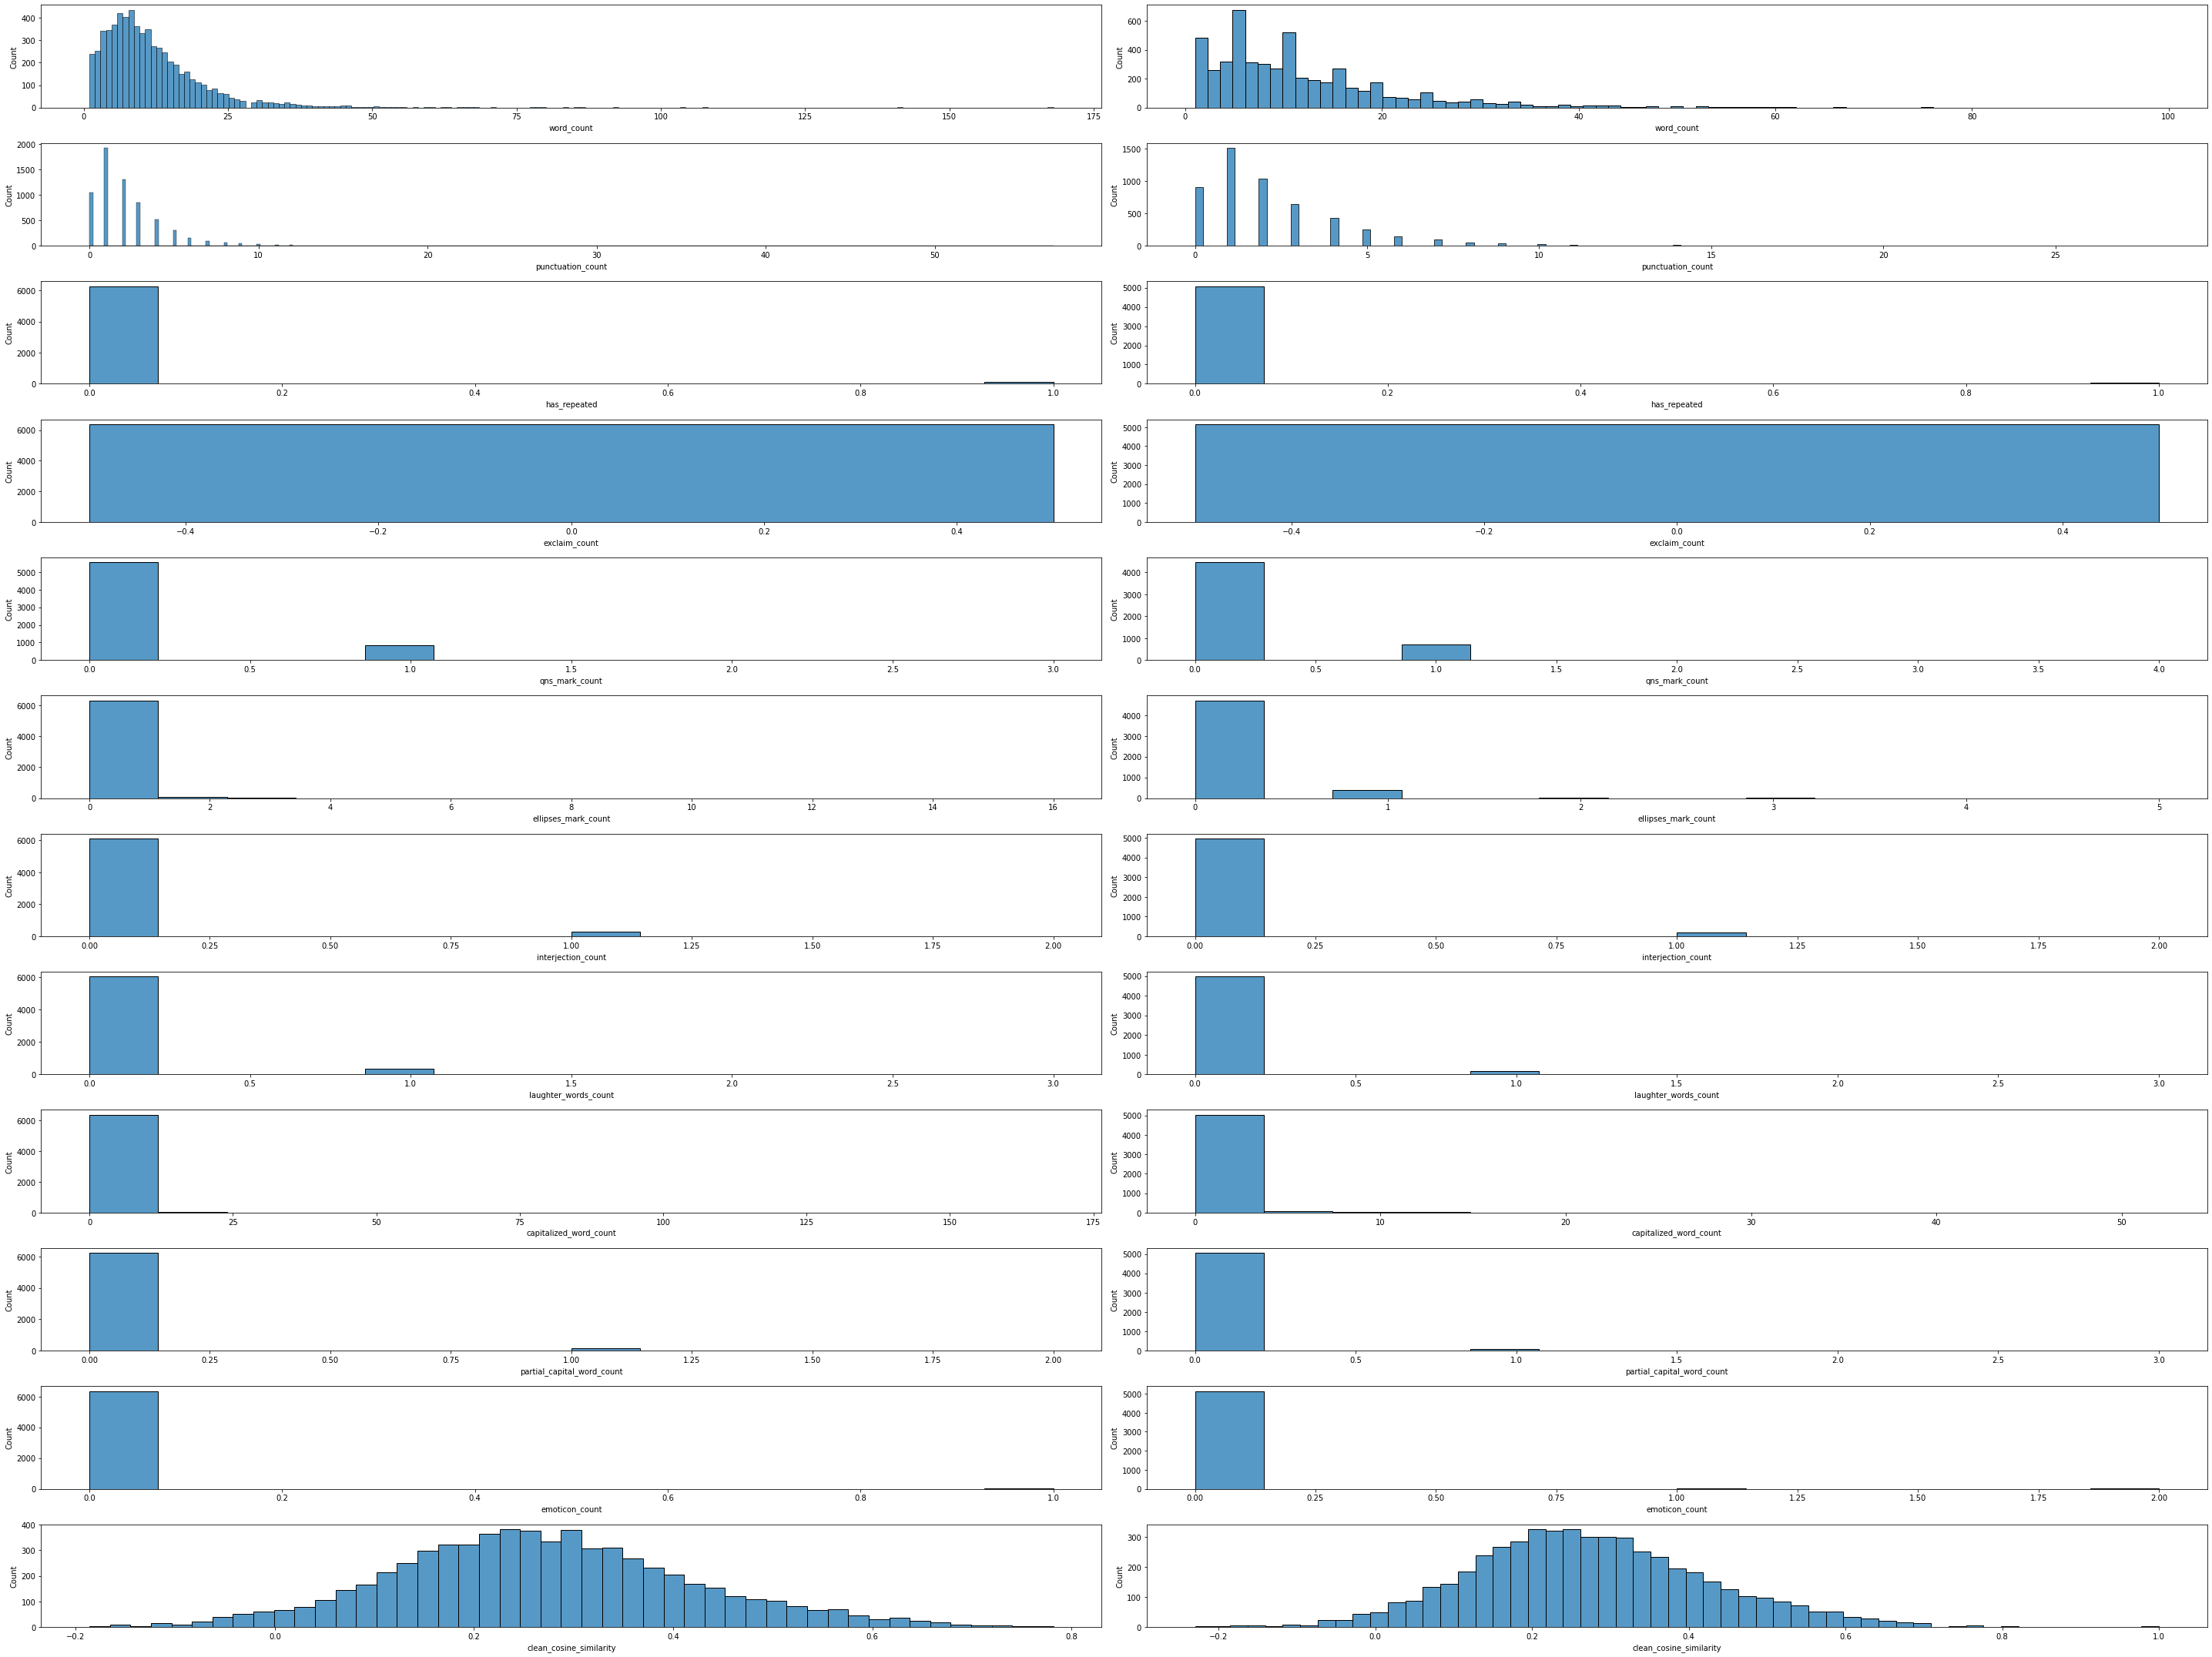

In [ ]:
plt.figure(figsize=(40,30))
k=1
for i in counts:
  plt.subplot(12,2,k)
  sns.histplot(x=hyper_pred_improve[i])
  
  plt.subplot(12,2,k+1)
  sns.histplot(x=hyper_pred_worse[i])
  k+=2
plt.tight_layout()

In [17]:
test_data[test_data.index == 337446]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
337446,1,Let's just skip the Jill stein farce and elect...,bruceholder84,jillstein,1.0,1.0,0.0,2016-07,25/7/16 18:12,Why we have to rally behind Jill stein now mor...,Let 's skip Jill stein farce elect Trump !,Why rally behind Jill stein ever ( X-post Koss...,Lets just skip the Jill stein farce and elect ...,Why we have to rally behind Jill stein now mor...,Lets skip Jill stein farce elect Trump,Why rally behind Jill stein ever Xpost Kossack...,"[0.16645527, -0.08757466, -0.32650626, -0.1745...","[0.42375305, 0.06244098, -0.30821297, -0.10472...","[-2.2560093, 1.3278992, -0.6931175, -0.5429194...","[-3.0022879, 2.2299795, -1.6536287, -1.2023075...",0.103244,0.070358,10,2,0,1,0,0,0,0,0,0,0,neg,0,1,1


In [18]:
test_data[test_data.index == 359387]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
359387,1,You are so correct hence why the Fed did such ...,maxToTheJ,news,1.0,1.0,0.0,2016-04,28/4/16 4:50,Economic models are actually incredibly effect...,You correct hence Fed good job prepare well ad...,Economic model actually incredibly effective c...,You are so correct hence why the Fed did such ...,Economic models are actually incredibly effect...,You correct hence Fed good job prepare well ad...,Economic model actually incredibly effective c...,"[0.13849387, 0.45905632, -1.0287778, -0.608845...","[0.30320215, 0.63244146, -0.92988724, -0.70804...","[0.4198931, 0.53320163, 0.08188114, 0.99638563...","[0.51758885, 0.5267462, 0.21846431, 0.886556, ...",0.112903,0.120897,25,1,0,0,0,0,0,0,0,0,0,pos,1,1,1
